# Email spam or ham Classification #  
Classify emails into Spam or Ham using Naive Bayes Classifier

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the data
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df.head(100)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
95,"Subject: v - shoop hello , welcome to the med...",1
96,Subject: you need only 15 minutes to prepare f...,1
97,Subject: do i require an attorney to use this ...,1
98,Subject: high - quality affordable logos corp...,1


In [4]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


**Visualize Dataset**

In [6]:
#Split ham and spam
ham = spam_df[spam_df["spam"] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
#Split ham and spam
spam = spam_df[spam_df["spam"] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [8]:
print('Spam percentage =', (len(spam) / len(spam_df) )*100, "%")

Spam percentage = 23.88268156424581 %


In [9]:
print('Ham percentage =', (len(ham) / len(spam_df) )*100, "%")

Ham percentage = 76.11731843575419 %


<Axes: ylabel='count'>

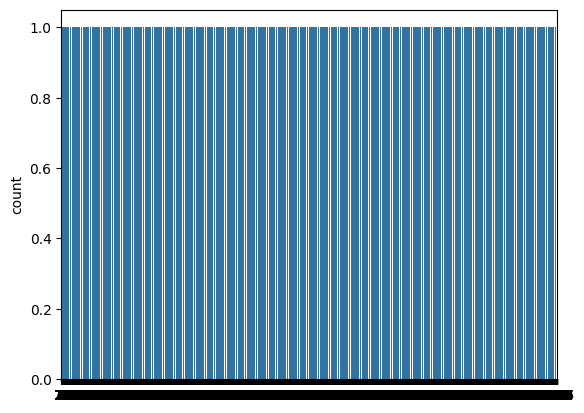

In [10]:
#Plot spam vs ham
plt.figszie = (10, 7)
sns.countplot(spam_df['spam'], label = "Count Spam vs Ham")

**Feature Engineering**

In [11]:
vectorizer = (
    CountVectorizer()
)  # Convert a collection of text documents to a matrix of token counts
spam_ham_vectorizer = vectorizer.fit_transform(
    spam_df["text"]
)  # Learn the vocabulary dictionary and return term-document matrix

In [14]:
print(spam_ham_vectorizer.toarray()) #Print the term-document matrix
spam_ham_vectorizer.shape #Print the shape of the term-document matrix - Messages x Words

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5728, 37303)

**Training the model**  
First we are training NB model using the whole data and testing it on our own sample data

In [21]:
#xtrcting the labels
labels = spam_df["spam"].values
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
# Create the naive bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(spam_ham_vectorizer, labels) #Fit the classifier according to the given training data


MultinomialNB()

In [27]:
#Create a sample email
sample = ["Hi Kim, Please let me know if you need any further information. Thanks",'Free money!!!', ]
sample_vectorizer = vectorizer.transform(sample) #Transform documents to document-term matrix
sample_vectorizer.toarray() #Print the term-document matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
sample_predict = nb_classifier.predict(
    sample_vectorizer
)  # Perform classification on an array of test vectors X
sample_predict

array([0, 1], dtype=int64)

Perform train test split and perform classification

In [32]:
X = spam_ham_vectorizer
y = labels

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Split arrays or matrices into random train and test subsets

In [34]:
spam_ham_classifier = MultinomialNB()
spam_ham_classifier.fit(X_train, y_train) #Fit the classifier according to the given training data

MultinomialNB()

**Evaluation**  

In [36]:
y_predict_train = spam_ham_classifier.predict(X_train) #Perform classification on an array of test vectors X

In [37]:
cm_train = confusion_matrix(y_train, y_predict_train) #Compute confusion matrix to evaluate the accuracy of a classification

<Axes: >

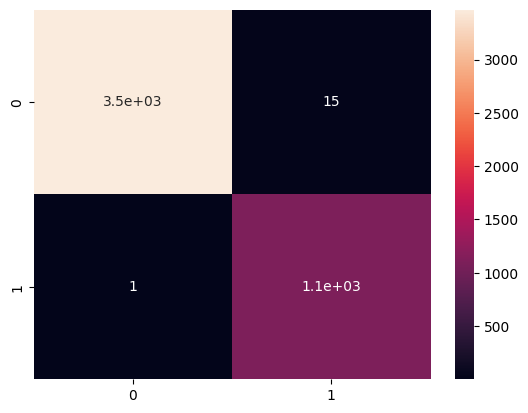

In [38]:
sns.heatmap(cm_train, annot=True) #Plot rectangular data as a color-encoded matrix

<Axes: >

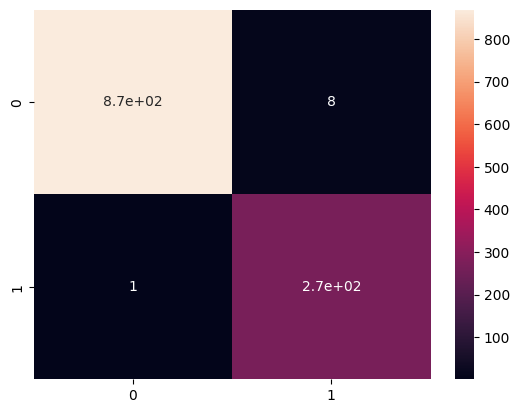

In [39]:
#Print the classification report of the testing data
y_predict_test = spam_ham_classifier.predict(X_test) #Perform classification on an array of test vectors X
cm_test = confusion_matrix(y_test, y_predict_test) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(cm_test, annot=True) #Plot rectangular data as a color-encoded matrix

In [40]:
print(classification_report(y_test, y_predict_test)) #Build a text report showing the main classification metrics

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



The precision and recall for both and pam and ham classification is almost around 1. Therefore the Naive baye's model works well.